
### <center><s>Margarine, Popcorn, and Skynet's role in the Technological Singularity Event</s></center>
<center><s>*aka Keanu Reeves rumored to be considering role in "A.I. Artificial Intelligence" prequel*</s></center>
# <s></s>
## <s></s>
# $$\textbf{Soft Margins, the Kernel Trick, and Support Vector Machines}$$ 
$$\large{\textit{aka, Support Vector Classifiers}}$$
## <s></s>
## <s></s>
### $$\textrm{Scott Lee Schwartz, Ph.D.}$$
## <s></s>
## <s></s>

In [1]:
%%html
<style>table,td,tr,th {border:none!important}</style>

# Objectives:
## - SVM (SVC)
## - Support Vectors and Margin
## - How SVC are fit
## - Soft Margin (and what it does)
## - Kernel Trick

<table style="width:100%" border="none">
<tr>
<td>
<h1>Happy (belated) Fourth of July!</h1>
<ul><li> To celebrate, I have </li>
<ul>
<li> a lot of red, white and blue plots </li>
<li> Donald Trump</li>
</ul>
</ul>
<h3>Republican Primaries (Data available on Kaggle)</h3>
<h4>County level demographic data</h4>
<ul>
<li>% &lt; 18 years old</li>
<li>% with a HS degree</li>
<li>median household income</li>
<li>population per square-mile</li>
<li>and much, much more...</li>
</ul>
<h4>County level primary voting outcomes</h4>
<ul>
<li>I characterize counties as *strongly* pro Donald (or not)</li> 
<li> in "one-versus-all" characterization</li>
</ul>
</td>
<td>
<img src="stuffs/kaggle3.png" width="270px">
</td>
</tr>
<tr>
<td colspan="2">
<h3>County level demographic data</h3>
<ul>
<li>Suppose this is a subset of all county results -- those where primary voting has completed</li>
<li>We might imagine predicting outcomes in future county primary elections based on currently available results
</li>
</ul>
</td>
</tr>
</table>




In [3]:
import pandas as pd
import numpy as np

rp=pd.read_csv("stuffs/DTRprimaries.csv")
rp=rp.reindex(np.random.permutation(rp.index))
rp[:13]

,DT,under18,withhs,medincome,ppm2
370,0,34.8,89.4,52023,23.9
371,0,30.8,70.2,40126,37.5
1322,0,26.4,83.1,57535,208.3
607,1,23.6,79.6,35421,37.9
659,1,24.6,75.8,34636,48.6
1124,1,23.4,84.2,44318,101.4
996,0,23.9,80.7,34867,11.5
0,1,25.2,85.6,53682,91.8
718,0,24.0,88.3,47015,1115.3
1082,1,22.5,75.8,34233,37.7


In [4]:
import matplotlib.pyplot as plt
import pylab
%matplotlib inline

def xyscatter(ax,x,y,xlab,ylab,c,ec,size,alph):
  ax.scatter(x,y,color=c,alpha=alph,s=size,edgecolor=ec)
  plt.ylim([min(y)-.05*np.ptp(y),max(y)+.05*np.ptp(y)])
  plt.ylabel(ylab)
  plt.xlim([min(x)-.05*np.ptp(x),max(x)+.05*np.ptp(x)])
  plt.xlabel(xlab)
  return(ax)

def dtlegend(ax,x,y,c,size):    
  ax.scatter(min(x)+.05*np.ptp(x),min(y)+.94*np.ptp(y),color=c[0],edgecolor=c[1],s=size)
  ax.scatter(min(x)+.05*np.ptp(x),min(y)+.89*np.ptp(y),color=c[2],edgecolor=c[3],s=size)
  ax.annotate('dTrump',xy=(min(x)+.075*np.ptp(x),min(y)+.93*np.ptp(y)))
  ax.annotate('ne1But',xy=(min(x)+.075*np.ptp(x),min(y)+.88*np.ptp(y)))    

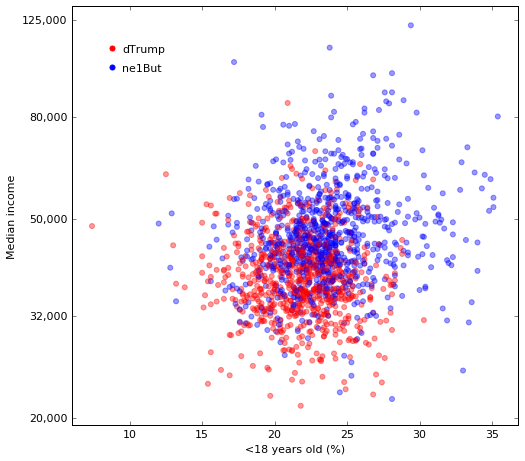

In [5]:
from matplotlib import rc
plt.rc('font',size=11)
pylab.rcParams['figure.figsize']=(8,7.5)

u18 = rp['under18']
lmi = np.log(rp['medincome'])
dtw = rp['DT']
col = ['b' if i == 0 else 'r' for i in dtw]

def lmi_axis(ax,val):
  plt.yticks(np.log(val),["{:,}".format(v) for v in val])

fig, ax = plt.subplots()  
xyscatter(ax,u18,lmi,"<18 years old (%)","Median income",col,col,25,.4)
dtlegend(ax,u18,lmi,['r','r','b','b'],25)
lmi_axis(ax,[20000,32000,50000,80000,125000])

* Younger counties tend to *not* be so into Donald
* Wealthier counties tend to *not* be so into Donald

In [6]:
from itertools import product
from sklearn.linear_model import LogisticRegression

def probsurface(x1,x2,y,grid):
  lr   = LogisticRegression(C=10000000)
  fit  = lr.fit(list(zip(x1,x2)),np.ravel(y))
  px   = fit.predict_proba(list(zip(x1,x2)))
  x1   = np.linspace(min(x1)-.1*np.ptp(x1),max(x1)+.1*np.ptp(x1),grid)
  x2   = np.linspace(min(x2)-.1*np.ptp(x2),max(x2)+.1*np.ptp(x2),grid)
  grid = np.array(list(product(x1,x2)))
  p    = fit.predict_proba(grid)
  return (grid[:,0],grid[:,1],p[:,1],px[:,1])

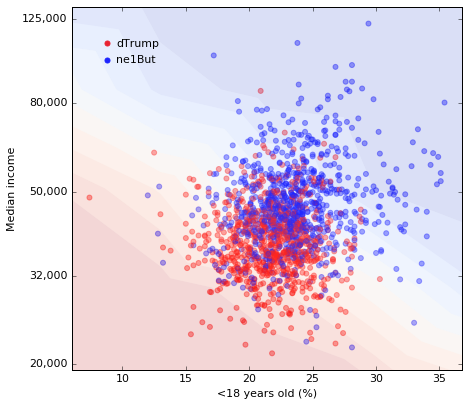

In [7]:
pylab.rcParams['figure.figsize']=(7,6.5)

fig, ax = plt.subplots()  
xyscatter(ax,u18,lmi,"<18 years old (%)","Median income",col,col,25,.4)
dtlegend(ax,u18,lmi,['r','r','b','b'],25)
lmi_axis(ax,[20000,32000,50000,80000,125000])

(x1,x2,p,px) = probsurface(u18,lmi,dtw,5)
oblvn=plt.tricontourf(x1,x2,p,9,antialiased=True,cmap=plt.cm.coolwarm,alpha=.2)

* Essentially, preference of the Donald *decreases* as we move towards the upper left (Northwest) of the plot
* While preference of the Donald *increases* as we move towards the upper left (Northwest) of the plot
* Let's explicity model these preferences...
  * We shall estimate the probability (based on the data) that a county goes Donald given Age and Income
  * We shall do this with the vanilla logistic regression (linear) model "DT~Age+Income"

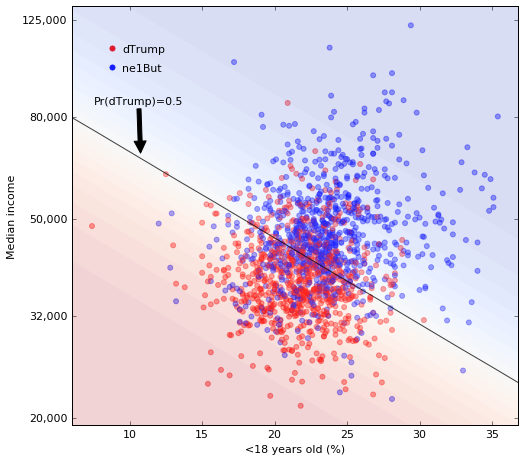

In [8]:
pylab.rcParams['figure.figsize']=(8,7.5)

fig, ax = plt.subplots()  
xyscatter(ax,u18,lmi,"<18 years old (%)","Median income",col,col,25,.4)
dtlegend(ax,u18,lmi,['r','r','b','b'],25)
lmi_axis(ax,[20000,32000,50000,80000,125000])

(x1,x2,p,px) = probsurface(u18,lmi,dtw,125)
plt.tricontourf(x1,x2,p,20,antialiased=True,cmap=plt.cm.coolwarm,alpha=.2)

plt.plot(x1[abs(p-.5)<.001],x2[abs(p-.5)<.001],color='k',alpha=.75)
oblvn=ax.annotate('Pr(dTrump)=0.5',xy=(10.75,11.125),xytext=(7.55,11.35),
            arrowprops=dict(facecolor='k',shrink=.001))

* The logistic regression model ("DT~Age+Income") estimates a probability gradient as a function of Age and Income
* Here we can see all the combinations of Age and Income which result in a 50/50 chance the county goes Donald

In [10]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import rcParams

# can use probsurface inside here...
def xyzsurface(x1,x2,y,col,xlab,ylab,zlab,grid,axs,val,angle,thrsh):
  def allies(ax):
    plt.rc('font',size=8)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    ax.set_zlabel(zlab)
    plt.ylim([min(x2)-.05*np.ptp(x2),max(x2)+.05*np.ptp(x2)])
    plt.xlim([min(x1)-.05*np.ptp(x1),max(x1)+.05*np.ptp(x1)])
    ax.set_zlim([0,1])
    ax.set_zticks([.1,.3,.5,.7,.9])
    ax.dist,ax.azim,ax.elev=(10,angle,20)
    axs(ax,val)
    
  (X,Y,Z,Zx) = probsurface(x1,x2,y,grid)
  colr=np.array(['r' if i > .5 else 'b' for i in Z])
  X.shape, Y.shape, Z.shape, colr.shape= ((grid,grid),(grid,grid),(grid,grid),(grid,grid))
  X=np.array(list(zip(*X.tolist())))
  Y=np.array(list(zip(*Y.tolist())))
  Z=np.array(list(zip(*Z.tolist())))
  colr=np.array(list(zip(*colr.tolist())))
  a,b,c,colr=(X.flatten(),Y.flatten(),Z.flatten(),colr.flatten())

  fig=plt.figure()

  ax=fig.add_subplot(221,projection="3d")
  allies(ax)  
  ax.scatter(np.array(x1),np.array(x2),0,alpha=.2,s=1,c=col,edgecolor=col,linewidth=.25)

  ax=fig.add_subplot(222,projection="3d")
  allies(ax)  
  ax.scatter(np.array(x1),np.array(x2),0,alpha=.2,s=1,c="grey",edgecolor="grey")
  ax.scatter(np.array(x1),np.array(x2),Zx,s=3,alpha=.4,c=col,edgecolor=col,linewidth=.25)
  ax.plot_surface(X,Y,Z,rstride=1,cstride=1,linewidth=0,cmap=plt.cm.coolwarm,alpha=.7)

  ax=fig.add_subplot(223,projection="3d")
  allies(ax)  
  ax.scatter(np.array(x1),np.array(x2),0,alpha=.2,s=1,c="grey",edgecolor="grey")
  ax.scatter(np.array(x1),np.array(x2),Zx,s=3,alpha=.4,c=col,edgecolor=col,linewidth=.25)
  ax.plot_surface(X,Y,Z,rstride=1,cstride=1,linewidth=0,cmap=plt.cm.coolwarm,alpha=.7)    
  ax.scatter(a,b,.5,alpha=.05,marker=".",c=colr,linewidth=0)   
  plt.plot(a[abs(c-.5)<thrsh],b[abs(c-.5)<thrsh],.5,color='k',linestyle=":")

  ax=fig.add_subplot(224,projection="3d")
  allies(ax)  
  ax.scatter(np.array(x1),np.array(x2),0,alpha=.2,s=1,c=col,edgecolor=col)
  ax.scatter(np.array(x1),np.array(x2),Zx,s=3,alpha=.4,c=col,edgecolor=col,linewidth=.25)
  ax.plot_surface(X,Y,Z,rstride=1,cstride=1,linewidth=0,cmap=plt.cm.coolwarm,alpha=.7)    
  ax.scatter(a,b,.5,alpha=.05,marker=".",c=colr,linewidth=0)   
  plt.plot(a[abs(c-.5)<thrsh],b[abs(c-.5)<thrsh],.5,color='k',linestyle=":")
  ax.scatter(a,b,0,alpha=.05,marker=".",c=colr,linewidth=0)   
  plt.plot(a[abs(c-.5)<thrsh],b[abs(c-.5)<thrsh],0,color='k',linestyle=":")

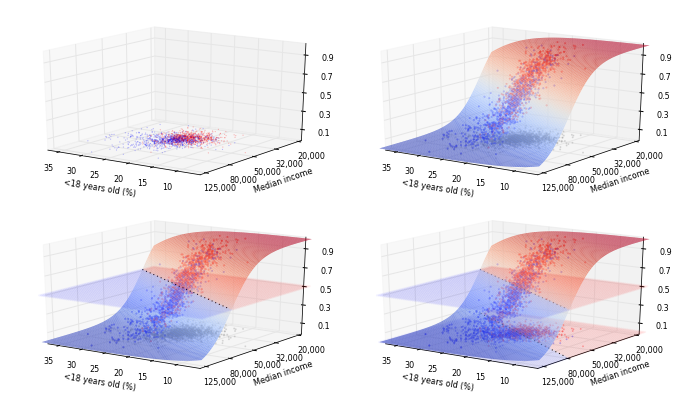

In [11]:
import warnings
warnings.filterwarnings("ignore")
rcParams.update({'figure.autolayout': True})
pylab.rcParams['figure.figsize']=(9.5,5.5)


xyzsurface(u18,lmi,dtw,col,"<18 years old (%)","Median income","",75,
           lmi_axis,[20000,32000,50000,80000,125000],125,.004)

* (1) The top left figure shows our the county level Age and Income data 
* (2) The top right figure shows the probability (surface) as a function of Age and Income
  * We estimate the probability a county goes Donald with the "DT~Age+Income" logistic regression model
    * Note the sigmoidal shape of the probability curve -- this is a property of logistic regression
* (3) The bottom left plot shows where the curve hits 50% (i.e., where it intersects with the z+0y+0x=0.5 plane)
* (4) The bottom right plot projects this intersection down into the original space (the z+0y+0x=0.0 plane)

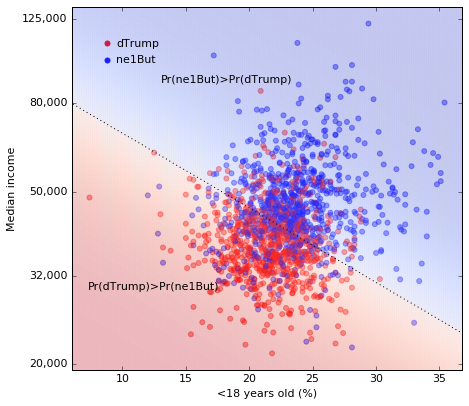

In [12]:
rcParams.update({'figure.autolayout': False})
warnings.resetwarnings()

pylab.rcParams['figure.figsize']=(7,6.5)

fig, ax = plt.subplots()
plt.rc('font',size=11)

xyscatter(ax,u18,lmi,"<18 years old (%)","Median income",col,col,25,.4)
dtlegend(ax,u18,lmi,['r','r','b','b'],25)
lmi_axis(ax,[20000,32000,50000,80000,125000])
(x1,x2,p,px) = probsurface(u18,lmi,dtw,200)
plt.plot(x1[abs(p-.5)<.001],x2[abs(p-.5)<.001],color='k',linestyle=':')
plt.tricontourf(x1,x2,p,150,antialiased=True,cmap=plt.cm.coolwarm,alpha=.25)

pcol=np.array(['b']*len(p))
pcol[p>.5]='r'
ax.scatter(x1,x2,alpha=.05,c=pcol,marker='.',linewidth=0)
ax.annotate('Pr(ne1But)>Pr(dTrump)',xy=(13,11.4))
oblvn=ax.annotate('Pr(dTrump)>Pr(ne1But)',xy=(7.25,10.3))

* So, if our objective is to predict future voting outcomes based on these data...
* then we can theoretically maximize our accuracy by guessing the outcome with the highest predicted probability

### So estimating probabilities is a way to make a *classification* prediction decision
* Let's explore this further in a much simpler, smaller case

In [13]:
rp_s=pd.read_csv("stuffs/DTRprimaries_small.csv")
pd.concat([rp_s[:10],rp_s[10:].reset_index(drop=True)],axis=1)

,DT,under18,medincome,DT,under18,medincome
0,1,20.6,27353,0,26.2,50112
1,1,21.9,34419,0,27.2,82762
2,1,25.9,30345,0,26.9,49481
3,1,25.2,28853,0,26.1,74155
4,1,22.6,26104,0,28.3,40157
5,1,23.7,32054,0,27.1,53137
6,1,19.7,41550,0,33.6,34146
7,1,20.6,30023,0,23.5,47277
8,1,15.4,23451,0,27.1,56853
9,1,22.4,35329,0,23.0,58025


,DT,under18,medincome,DT,under18,medincome,DT,under18,medincome,DT,under18,medincome
0,1,20.6,27353,1,23.7,32054,0,26.2,50112,0,27.1,53137
1,1,21.9,34419,1,19.7,41550,0,27.2,82762,0,33.6,34146
2,1,25.9,30345,1,20.6,30023,0,26.9,49481,0,23.5,47277
3,1,25.2,28853,1,15.4,23451,0,26.1,74155,0,27.1,56853
4,1,22.6,26104,1,22.4,35329,0,28.3,40157,0,23.0,58025


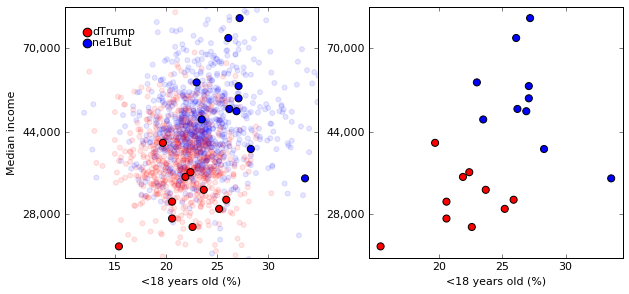

In [15]:
pylab.rcParams['figure.figsize']=(10,4.5)

u18_s = rp_s['under18']
lmi_s = np.log(rp_s['medincome'])
dtw_s = rp_s['DT']
col_s = ['b' if i == 0 else 'r' for i in dtw_s]

fig = plt.figure()
ax = fig.add_subplot(121)
xyscatter(ax,u18,lmi,"","",col,col,25,.1)
xyscatter(ax,u18_s,lmi_s,"<18 years old (%)","Median income",col_s,'k',50,1)
lmi_axis(ax,[28000,44000,70000])
dtlegend(ax,u18_s-4,lmi_s,['r','k','b','k'],75)
plt.xlim([10.1,34.9])

ax = fig.add_subplot(122)
xyscatter(ax,u18_s,lmi_s,"<18 years old (%)","",col_s,'k',50,1)
lmi_axis(ax,[28000,44000,70000])
plt.xticks([20,25,30])

pd.concat([rp_s[:5],rp_s[5:10].reset_index(drop=True),
           rp_s[10:15].reset_index(drop=True),rp_s[15:].reset_index(drop=True)],axis=1)

* So we select 10 counties that were pro Donald and 10 that weren't and just consider these 
* Importantly, we have selected 10 counties that are clearly "separable"

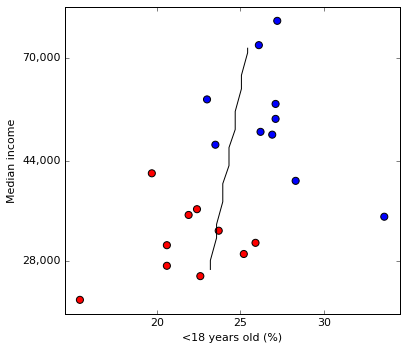

In [17]:
pylab.rcParams['figure.figsize']=(6,5.5)

fig = plt.figure()
ax = fig.add_subplot(111)
xyscatter(ax,u18_s,lmi_s,"<18 years old (%)","Median income",col_s,'k',50,1)
lmi_axis(ax,[28000,44000,70000])
tmp=plt.xticks([20,25,30])

lr=LogisticRegression(C=100000000,solver='sag')
fit=lr.fit(list(zip(u18_s,lmi_s)),dtw_s)
tmp=list(product(np.linspace(min(u18_s),max(u18_s),50),np.linspace(10.2,11.2,50)))
p=fit.predict_proba(tmp)
tmp=np.array(tmp)
oblvn=plt.plot(tmp[abs(p[:,1]-.5)<.01,0],tmp[abs(p[:,1]-.5)<.01,1],color='k')

* If we start the same way we run into the unexpected problem that the the problem is *too easy* for logistic regression
  * (1) there are infinitely many solutions, and (2) these coefficient estimates that approach infinity

### We're just want a decision boundary to predict red or blue here... this should be easy

In [18]:
def example(x,x1,x2,col):
  ax = fig.add_subplot(x)
  xyscatter(ax,x1,x2,"","",col,'k',50,1)
  plt.xticks(np.linspace(min(x1),max(x1),5),[""]*5)
  plt.yticks(np.linspace(min(x2),max(x2),5),[""]*5)
  return(ax)

def density_prediction(ax,x1,x2,gridsize,fit,mean,cov):
  x11 = np.linspace(min(x1)-.1*np.ptp(x1),max(x1)+.1*np.ptp(x1),gridsize)
  x22 = np.linspace(min(x2)-.1*np.ptp(x2),max(x2)+.1*np.ptp(x2),gridsize)
  grid=np.array(list(product(x11,x22)))
  for i in [0,1]:
    d=ss.multivariate_normal.pdf(grid,mean[i],cov[i])
    d=d/max(d)
    plt.tricontour(grid[:,0],grid[:,1],d,1,colors=['b','r'][i])
  p=np.array(fit.predict(grid))  
  pcol=np.array(['b']*len(p))
  pcol[p==1]='r'
  p.shape=(gridsize,gridsize)
  p=p.T
  p=p.flatten()        
  p=p[:-1]-p[1:]
  p[p==-1]=0
  p=np.append(p,0)
  p.shape=(gridsize,gridsize)
  p=p.T
  p=p.flatten()        
  ax.plot(grid[p==1,0],grid[p==1,1],color='k')
  ax.scatter(grid[:,0],grid[:,1],alpha=.05,c=pcol,marker='.',linewidth=0)

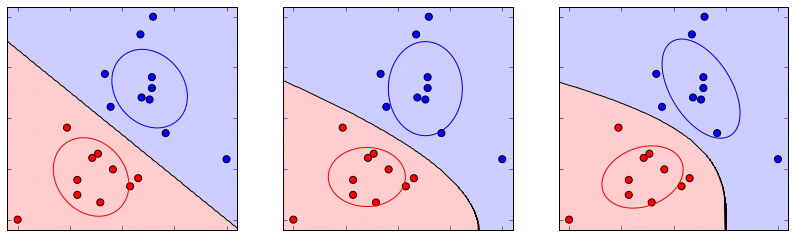

In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
import scipy.stats as ss
pylab.rcParams['figure.figsize']=(14,4)

fig = plt.figure()

ax=example(131,u18_s,lmi_s,col_s)
LDA=LinearDiscriminantAnalysis(store_covariance=True)
fit=LDA.fit(list(zip(u18_s,lmi_s)),dtw_s)
density_prediction(ax,u18_s,lmi_s,250,fit,fit.means_,[fit.covariance_,fit.covariance_])

ax=example(132,u18_s,lmi_s,col_s)
gNB=GaussianNB()
fit=gNB.fit(list(zip(u18_s,lmi_s)),dtw_s)
density_prediction(ax,u18_s,lmi_s,250,fit,fit.theta_,[np.diag(fit.sigma_[0]),np.diag(fit.sigma_[1])])

ax=example(133,u18_s,lmi_s,col_s)
QDA=QuadraticDiscriminantAnalysis(store_covariances=True)
fit=QDA.fit(list(zip(u18_s,lmi_s)),dtw_s)
density_prediction(ax,u18_s,lmi_s,250,fit,fit.means_,fit.covariances_)

## Rather than logistic regression, I now use discriminant analysis
* Regression estimates a distribution of variable conditional on covariates
* Discriminant analysis estimates the joint distribution of all variables 
    * **and then uses Bayes' Theorem to estimate the conditional distribution of the outcome**
    
### One might make several parametric modeling assumptions in doing this
  * E.g., one might specify **normality** and the structure of **covariance matrix** therein
    * A common covariance matrix is called **LDA** (*Linear Discriminant Analysis*) 
    * Unique, but diagonal covariance matricies (i.e., independent covariates) is called **Naive Bayes** 
    * Unique, unstructured covariance matricies is called **QDA** (*Quadratic Discriminant Analysis*)
    
### These all just produce a decision boundary with varying degrees of flexibility
* And discriminant analysis is just one class of many available for doing this...

In [19]:
from sklearn.neighbors import KNeighborsClassifier

#from sklearn.neural_network import MLPClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.linear_model import SGDClassifier

* So, as a statistician, my first thought when approaching a classification problem is *"Logistic Regression"*
* Alternatively, my engineering friends who do "signal processing", would instead think *"Discriminant Analysis"*
* And other analysts might think *"Nearest Neighbors"*, *"Tree-based methods"*, or *"Neural Networks"*.

## And rightly so: all have seen success in various applications

### There is another tool that's very hot and popular out of the machine learning community in academia 
* A computer scientist, from the machine learning community, might first think <br>     *"Support Vector Machine..."*

In [20]:
from sklearn.svm import SVC

# What is a decision (separating) rule in each dimension?

<table style="center" border="none">
<tr><td><img src="stuffs/Dimension_levels.png" width="800px"></td></tr>
</table>

# All points ${\boldsymbol x}$ in p-dimensional space (${\boldsymbol x} \in \mathbb{R}^p$) satisfying
# $$\begin{eqnarray*}
&&{\boldsymbol w}^T{\boldsymbol x} + b \\
&=& {\boldsymbol w}\cdot {\boldsymbol x} + b = 0\end{eqnarray*}$$
# define a $p-1$ dimensional hyperplane subspace in p-dimensional space 

<table style="center" border="none">
<tr><td><img src="stuffs/2d_hyper_example.png" width="500px"></td><td><img src="stuffs/3d_sep_mine.png" width="400px"></td></tr>
</table> 
 
# $$
\begin{eqnarray*}
\underline{\text{1-dimensional hyperplane (line):}}&&w_1x_1 + w_2x_2 + b = 0\\
\underline{\text{2-dimensional hyperplane (plane):}}&&w_1x_1 + w_2x_2 + w_3x_3 + b = 0\\
&&\vdots\\
\underline{\text{(p-1)-dimensional hyperplane:}}&&w_1x_1 + w_2x_2 + w_3x_3 + \cdots +  w_px_p + b = 0
\end{eqnarray*}$$

<table style="center" border="none">
<tr><td><img src="stuffs/SVM_optimize-2.png" width="400px"></td></tr>
</table> 



# ${\boldsymbol w}$ defines the hyperplane and $b$ defines its offset from the origin
# and the vector ${\boldsymbol w}$ is perpendicular to the hyperplane



# The (perpendicularly) distance from <font color='red'>$x_s$</font> to a line is  
# $\displaystyle \frac{{\boldsymbol w}}{||{\boldsymbol w}||} |$<font color='red'>$x_s$</font> $-$ <font color='green'>$x^*$</font>$|$ 
# for any <font color='green'>$x^*$</font> on the line

<table style="center" border="none">
<tr><td><img src="stuffs/SVM_optimize-4.png" width="400px"></td><td><img src="stuffs/SVM_optimize-3.png" width="400px"></td></tr>
</table> 


# There are many separating hyperplanes (scale ${\boldsymbol w}$ and compensate with $b$):

# $$\begin{eqnarray*}
&&{\boldsymbol w}^T{\boldsymbol x} + b \\
&=& (c{\boldsymbol w})^T{\boldsymbol x} + \left(b - ((c-1){\boldsymbol w})^T{\boldsymbol x}\right)\end{eqnarray*}$$

# If we choose  ${\boldsymbol w}$ satisfying 
# $$ {\boldsymbol w}^T{\boldsymbol x_s} + b = 1\quad \text{ and } \quad {\boldsymbol w}^T{\boldsymbol x^*} + b = 0 $$ (i.e., specify ${\boldsymbol w}$ so that the separating hyperplane and parallel  hyperplane passing through ${\boldsymbol x_s}$ have a one unit difference in the offset $b$), then $$\frac{{\boldsymbol w}}{||{\boldsymbol w}||} |x_s - x^*| = \frac{1}{||{\boldsymbol w}||}$$

<table style="center" border="none">
<tr><td><img src="stuffs/SVM_optimize-6.png" width="400px"></td></tr>
</table> 

# What is the best *linear* separating hyperplane (in two dimensions)?



<table style="center" border="none">
<tr><td><img src="stuffs/binclass_2.png" width="400px"></td><td><img src="stuffs/binclass_3.png" width="400px"></td></tr>
</table> 

# How about choosing the line that separates the points *and maximizes* the distance of points to the separating line (in a perpendicular sense)? 

<table style="center" border="none">
<tr><td><img src="stuffs/512px-Svm_separating_hyperplanes.png" width="400px"></td></tr>
</table>

In [21]:
from sklearn.preprocessing import scale

def svm_score(ax,x1,x2,gridsize,fit,lty='-'):
  x11 = np.linspace(min(x1)-.5*np.ptp(x1),max(x1)+.5*np.ptp(x1),gridsize)
  x22 = np.linspace(min(x2)-.5*np.ptp(x2),max(x2)+.5*np.ptp(x2),gridsize)
  grid=np.array(list(product(x11,x22)))
  for score in [0,1,-1]:
    p=np.array(fit.decision_function(grid))
    p[abs(p-score)<.001]=1
    plt.plot(grid[p==1,0],grid[p==1,1],color='k',linestyle=lty)
    lty = '--'

def svm_score2(ax,x1,x2,score,col,gridsize,fit,lty='-'):
  x11 = np.linspace(min(x1)+.2*np.ptp(x1),max(x1)-.2*np.ptp(x1),gridsize)
  x22 = np.linspace(min(x2)+.2*np.ptp(x2),max(x2)-.2*np.ptp(x2),gridsize)
  grid=np.array(list(product(x11,x22)))
  p=np.array(fit.decision_function(grid))
  colr=np.array(['none']*len(p))
  colr[abs(p-score)<.01]=col
  ax.scatter(grid[:,0],grid[:,1],color=colr,edgecolor=colr,s=1)
    
def svm_margin(ax,fit,x):
  a=np.array([x,((-fit.intercept_-x*fit.coef_[0][0])/fit.coef_[0][1])[0]])
  w=fit.coef_[0]
  w=(w/(sum(w*w)**.5))*np.ptp([sum(i) for i in (w/(sum(w*w)**.5))*fit.support_vectors_])/2
  plt.plot(a[0]+np.array([0,-w[0]]),a[1]+np.array([0,-w[1]]),color='g',linestyle=":")
  plt.plot(a[0]+np.array([0,w[0]]),a[1]+np.array([0,w[1]]),color='g',linestyle=":")
    
def annotate(fit,x):
  a=np.array([x,((-fit.intercept_-x*fit.coef_[0][0])/fit.coef_[0][1])[0]])
  ax.annotate('support vector',xy=fit.support_vectors_[1,:]+(.05,-.2),xytext=(.7,-2.25),
            arrowprops=dict(facecolor='k',shrink=.001))
  tmp=ax.annotate('margin',xy=a+(.025,.25),xytext=(-2,2),
                arrowprops=dict(facecolor='k',shrink=.001))
    
def exampleCS(x,x1,x2,col):
  cs=example(x,x1,x2,col)
  plt.ylim([-2.5,2.5])
  plt.xlim([-2.5,2.5])
  return(cs)

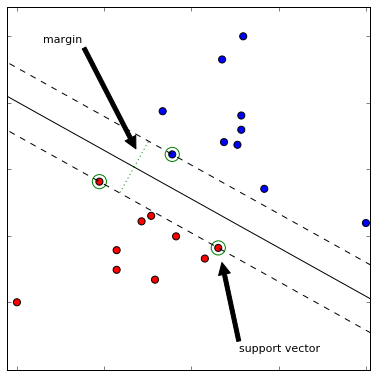

In [22]:
pylab.rcParams['figure.figsize']=(6.5,6.5)

fig = plt.figure()
pars={'color':'g','marker':'o','s':200,'facecolors':'none'}
ax=exampleCS(111,scale(u18_s),scale(lmi_s),col_s)

SVM=SVC(C=100000000,kernel='linear')
fit=SVM.fit(list(zip(scale(u18_s),scale(lmi_s))),dtw_s)

svm_score(ax,scale(u18_s),scale(lmi_s),400,fit)
ax.scatter(fit.support_vectors_[:,0],fit.support_vectors_[:,1],**pars)
svm_margin(ax,fit,-.75)
annotate(fit,-.75)

### Support Vector Classifiers
* find a "separating hyperplane" that classifies the data
* Initially, we'll say "perfectly" separating the data, but this will quickly be relaxed via the "soft margin"
* There are many such separating hyperplanes, so which shall we choose?
* We'll take the hyperplane which "maximizes the margin" such that no points violate the margin 

* $\text{A hyperplane in $\mathbb{R}^P$ is defined as}$

$$\textbf{w}'\textbf{x}+b=0, x \in \mathbb{R}^P, b \in \mathbb{R}$$

<s></s>
$\quad\quad\quad\textit{E.g., $\textbf{w}=(1,-1)$ and $b=0$ defines the 45 degree line in $\mathbb{R}^2$ (the so called "$y=x$" line)}$ 

<br>
* $\text{$\textbf{w}$ is perpendicular to $\textbf{w}'\textbf{x}+b=0$}$ 

  $$
  \begin{eqnarray*}
  \text{Suppose $\textbf{w}'\textbf{x}^*+b=0$ and $\textbf{w}'\textbf{x}^{**}+b=0$} &\quad\quad& \text{[}\textit{ $\textbf{x}^*$ and $\textbf{x}^{**}$ lie on the hyperplane}\text{]}\\
  \text{Then $\textbf{w}'(\textbf{x}^*-\textbf{x}^{**})=0$} & & \text{[}\textit{$\textbf{w}$ is perpendicular to $(\textbf{x}^*-\textbf{x}^{**})$}\text{]}\\
  \text{And so $\textbf{w}$ must be perpendicular to $\textbf{w}'\textbf{x}+b=0$} & & \text{[}\textit{since $(\textbf{x}^*-\textbf{x}^{**})$ is parallel $\textbf{w}'\textbf{x}+b=0$}\text{]}
  \end{eqnarray*}
$$
  
<br>
* $\text{Since $\textbf{w}'\textbf{x}+b=0$ and $c(\textbf{w}'\textbf{x}+b)=0$ 
define the same hyperplane for all $c \in \mathbb{R}$}$
* $\text{for a given data set $\{\textbf{x}_{n}: n = 1, \cdots, N\}$, 
we select $\textbf{w}$ (and $b$) such that}$ 

$$\underset{n = 1, \cdots, N}{\text{min}}\left|\textbf{w}'\textbf{x}_{n}+b\right|=1$$
* $\text{i.e., we select $\textbf{w}$ to make the closest $\textbf{x}_{s}$ live 
on either of the parallel hyperplanes with}$
$\text{intercepts that are offset by 1 unit from the $\textbf{w}'\textbf{x}+b=0$ hyperplane, i.e., $\left|\textbf{w}'\textbf{x}_{s}+b\right|=1$}$

<s></s>
$\quad\quad\quad\textit{E.g., with $b = 0, \textbf{w}=(1,-1)$ and  $\textbf{w}=(.5,-.5)$ both define the 45 degree "$y=x$" line}$
$\quad\quad\quad\textit{and $\textbf{x}_{s} = (1,0)'$ and $\textbf{x}_{s} = (2,0)'$
respectively live on the parallel hyperplanes 1 unit offset}$ 

$\quad\quad\quad\text{Which $\textbf{x}_{s}$ is }\textit{farther away} \text{ to the original hyperplane? Which $\textbf{w}$ has the }\textit{greatest} \text{ magnitude?}$ 




<br>
* $\text{Now }\textit{(for separated data)}\text{ we choose the hyperplane  $\textbf{w}'\textbf{x}^*+b=0$, which "maximizes the margin" to $\textbf{x}_{s}$:}$ 

$$
\begin{eqnarray*}
\underset{\textbf{w}}{\text{max}}\frac{\textbf{w}'}{\left|\left|\textbf{w}\right|\right|} |\textbf{x}_{s}-\textbf{x}^*| &=& 
\underset{\textbf{w}}{\text{max}} \frac{1}{\left|\left|\textbf{w}\right|\right|}\\
&&\textit{where } \left|\left|\textbf{w}\right|\right|=\sqrt{\textbf{w}'\textbf{w}} \textit{ and } 
\frac{\textbf{w}'}{\left|\left|\textbf{w}\right|\right|} \textbf{x} \textit{ is the projection of $\textbf{x}$ onto $\textbf{w}$}
\end{eqnarray*}
$$




### So how is this "maximizing" to find $\textbf{$w$}$ done?
* $\text{Let $y_n \in \{-1,1\}$ such that $y_n(\textbf{w}'\textbf{x}_{n}+b) \geq 1$, and optimize}$ 

<br>
$$
\begin{eqnarray*}
\underset{w}{\text{min}}\ \frac{\textbf{w}'\textbf{w}}{2} \text{: } (y_n(\textbf{w}'\textbf{x}_n+b)-1) \geq 0
&\quad\quad&
\textit{since $\underset{\textbf{w}}{\text{min}}\ \frac{\textbf{w}'\textbf{w}}{2}$ is equivalent to $\underset{\textbf{w}}{\text{max}} \frac{1}{\left|\left|\textbf{w}\right|\right|}= \underset{\textbf{w}}{\text{max}} \frac{1}{\sqrt{\textbf{w}'\textbf{w}}}$}\\
&& \textit{and $y_n(\textbf{w}'\textbf{x}_n+b) = 1$ for some $n$ since $\textbf{w}'\textbf{w}$ is being minimized}
\end{eqnarray*}$$

<br>
* $\text{Which can be solved by optimizing the Lagrangian}$

$$
\begin{eqnarray*}
\mathcal{L}(\textbf{w},b,\textbf{$\lambda$}) &=& \frac{\textbf{w}'\textbf{w}}{2} - \sum_{n=1}^N \lambda_n(y_n(\textbf{w}'\textbf{x}_n+b)-1)
\quad\quad\quad\quad\quad\quad\quad\ \lambda_n\geq0  \\ \hline
&=&\sum_{n=1}^N \lambda_n - \frac{1}{2} \sum_{m=1}^N \sum_{n=1}^N\lambda_my_m\textbf{x}_m'\textbf{x}_ny_n\lambda_n
- b\sum_{n=1}^N\lambda_ny_n\\
\longrightarrow&=&\textbf{1}'\textbf{$\lambda$} - \frac{1}{2}\textbf{$\lambda$}'\textbf{Q}\textbf{$\lambda$}
\quad (-\textbf{$I$}\textbf{$\lambda$} \leq \textbf{$0$}, -\textbf{$y$}'\textbf{$\lambda$} \leq 0, \textbf{$y$}'\textbf{$\lambda$} \leq 0)
\quad\quad  
Q_{mn}=y_m\textbf{x}_m'\textbf{x}_ny_n\\\\\hline
\mathcal{L}_\textbf{$w$}(\textbf{w},b,\textbf{$\lambda$}) &=& \textbf{w} - \sum_{n=1}^N \lambda_ny_n\textbf{x}_n \quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\ \ \ 
\textbf{w} = \sum_{n=1}^N \lambda_ny_n\textbf{x}_n\\
\mathcal{L}_b(\textbf{w},b,\textbf{$\lambda$}) &=& \sum_{n=1}^N \lambda_ny_n \quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad
0 = \sum_{n=1}^N \lambda_ny_n\\
\end{eqnarray*}
$$

* $\text{where the indicated expression ($\longrightarrow$) can be optimized via quadratic programming}$


##### $\text{Given $\{(y_n,\textbf{x}_n): n = 1, \cdots N\}$, optimization via quadratic programming provides}$ $\textbf{$\lambda$}$ $\text{from which we calculate}$

$$\textbf{w} = \sum_{n=1}^N \lambda_ny_n\textbf{x}_n$$

* $\text{Interestingly,}$ $\textbf{$\lambda$}$ $\text{is sparse -- i.e., many $\{\lambda_n: n = 1, \cdots N\}$ are zero}$


$$\{\textbf{x}_s: \lambda_s > 0, s = 1, \cdots N\} \text{ are the so called } \textbf{support vectors}$$


* $\text{$\textbf{w}'\textbf{x}+b=0$ defines the separating hyperplane with the largest margin $\left(\frac{1}{||\textbf{w}||}\right)$}$

  * $\text{$b$ is calculated from the support vectors } \{\textbf{x}_s\} \text{ and } \textbf{w}, \text{ subject to the constraint that} \left|\textbf{w}'\textbf{x}_{s}+b\right|=1$ 

***Note that the scale of each dimension of x matters since*** 
$\left|\left|\textbf{w}\right|\right| = 
\sqrt{\sum_{j=1}^{P}\left(\sum_{i=1}^{n}\lambda_iy_ix_{ij}\right)^2 }$

***<u>is not scale aware</u> and <u>equivalently penalizes each dimension</u> of $\textbf{x}_n$ (with respect to $\mathbb{R}^1$)***.

$\textbf{w}$ will therefore favor support vectors close in dimensions that have more spread since other dimensions with less spread contribute less to the cost.

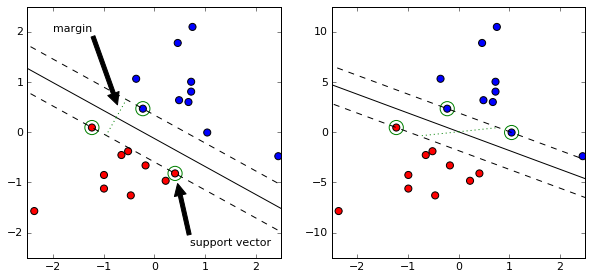

In [23]:
pylab.rcParams['figure.figsize']=(10,4.5)

fig = plt.figure()
pars={'color':'g','marker':'o','s':200,'facecolors':'none'}

SVM=SVC(C=100000000,kernel='linear')
fit=SVM.fit(list(zip(scale(u18_s),scale(lmi_s))),dtw_s)
#ax=exampleCS(121,scale(u18_s),scale(lmi_s),col_s)
#svm_score(ax,scale(u18_s),scale(lmi_s),400,fit)
#ax.scatter(fit.support_vectors_[:,0],fit.support_vectors_[:,1],**pars)

ax = fig.add_subplot(121)
s=1
xyscatter(ax,scale(u18_s),s*scale(lmi_s),"","",col_s,'k',50,1)
fit=SVM.fit(list(zip(scale(u18_s),s*scale(lmi_s))),dtw_s)
svm_score(ax,scale(u18_s),s*scale(lmi_s),400,fit)
ax.scatter(fit.support_vectors_[:,0],fit.support_vectors_[:,1],**pars)
plt.ylim([-2.5*s,2.5*s])
oblvn=plt.xlim([-2.5,2.5])
svm_margin(ax,fit,-.75)
annotate(fit,-.75)

ax = fig.add_subplot(122)
s=5
xyscatter(ax,scale(u18_s),s*scale(lmi_s),"","",col_s,'k',50,1)
fit=SVM.fit(list(zip(scale(u18_s),s*scale(lmi_s))),dtw_s)
svm_score(ax,scale(u18_s),s*scale(lmi_s),400,fit)
ax.scatter(fit.support_vectors_[:,0],fit.support_vectors_[:,1],**pars)
plt.ylim([-2.5*s,2.5*s])
oblvn=plt.xlim([-2.5,2.5])
svm_margin(ax,fit,0)

# How about categorical variables?

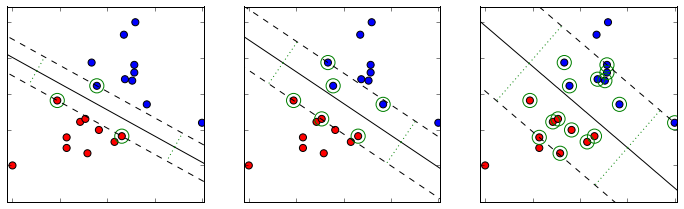

In [24]:
pylab.rcParams['figure.figsize']=(12,3.5)

fig = plt.figure()
pars={'color':'g','marker':'o','s':200,'facecolors':'none'}

ax=exampleCS(131,scale(u18_s),scale(lmi_s),col_s)
SVM=SVC(C=100000000,kernel='linear')
fit=SVM.fit(list(zip(scale(u18_s),scale(lmi_s))),dtw_s)
svm_score(ax,scale(u18_s),scale(lmi_s),400,fit)
ax.scatter(fit.support_vectors_[:,0],fit.support_vectors_[:,1],**pars)
svm_margin(ax,fit,-1.75)
svm_margin(ax,fit,1.75)

ax=exampleCS(132,scale(u18_s),scale(lmi_s),col_s)
SVM=SVC(C=.5,kernel='linear')
fit=SVM.fit(list(zip(scale(u18_s),scale(lmi_s))),dtw_s)
svm_score(ax,scale(u18_s),scale(lmi_s),400,fit)
ax.scatter(fit.support_vectors_[:,0],fit.support_vectors_[:,1],**pars)
svm_margin(ax,fit,1.5)
svm_margin(ax,fit,-1.5)

ax=exampleCS(133,scale(u18_s),scale(lmi_s),col_s)
SVM=SVC(C=.075,kernel='linear')
fit=SVM.fit(list(zip(scale(u18_s),scale(lmi_s))),dtw_s)
svm_score(ax,scale(u18_s),scale(lmi_s),400,fit)
ax.scatter(fit.support_vectors_[:,0],fit.support_vectors_[:,1],**pars)
svm_margin(ax,fit,-1.25)
svm_margin(ax,fit,1.25)

<table style="center" border="none">
<tr><td><img src="stuffs/outlier_hard.png" width="400px"></td><td><img src="stuffs/outlier_soft.png" width="400px"></td></tr>
</table> 

* $\text{Requiring data to be perfectly (linearly) separable}$ $\textit{seems}$ $\text{like a prohibative restriction}$  

* $\text{We therefore allow each point $\textbf{x}_n$ to violate the } \underline{margin} \text{ by some amount $\epsilon_n$, i.e.}$

$$y_n(\textbf{w}'\textbf{x}_n+b) \geq 1 \underline{-\ \epsilon_n}, \ 
\underline{\epsilon_n \geq 0}$$

* $\text{and (for $C > 0$) instead optimize}$

$$\underset{\textbf{w},\textbf{$\epsilon$}}{\text{min}}\ \frac{\textbf{w}'\textbf{w}}{2} \ 
\underline{+\ C\sum_{n=1}^N\epsilon_n} \text{:}\quad y_n(\textbf{w}'\textbf{x}_n+b) \geq 1 
\underline{-\ \epsilon_n}, \ 
\underline{\epsilon_n \geq 0}$$

* $\text{which results in a nearly identical quadratic programming problem as before but with an added constraint for $C$}$

$$\textbf{1}'\textbf{$\lambda$} - \frac{1}{2}\textbf{$\lambda$}'\textbf{Q}\textbf{$\lambda$}
\quad (-\textbf{$I$}\textbf{$\lambda$} \leq\textbf{$0$}, -\textbf{$y$}'\textbf{$\lambda$} \leq 0, \textbf{$y$}'\textbf{$\lambda$} \leq 0,\underline{\textbf{$I$}\textbf{$\lambda$} \leq\textbf{$C$}})$$

## This is the *"soft margin" support vector classifier* with penalty $C$ 
* *The support vectors are now the set of points which touch or pass the margin* $\{\textbf{x}_s: \left|\textbf{w}'\textbf{x} + b\right| \leq 1, s = 1, \cdots N\}$
* $C$ influences the width of margin, i.e., number of support vectors influencing the separating hyperplane 
  * Large $C$ heavily penalizes margin violations, i.e. favors smaller margins and fewer support vectors
  * Small $C$ tolerates increased violation, i.e., favors wider margins more support vectors 
  * Data on the "wrong side" of the separating plane are necessarily support vectors, 
  so increasing the margin means using more points on the "right side" of the separating plane to inform the separating plane
* Reducing $C$ performs *"regularization"* by shrinking estimation back towards the global estimate based on all the data

* $\text{The "soft margin" support vector classifier with}$ 

$$y_n(\textbf{w}'\textbf{x}_n+b-1+\epsilon_n) \geq 0, \epsilon_n \geq 0, 
\text{for $n = 1, \cdots, N$ and penalty $C$}$$

* $\text{optimizes the}$ $\underline{\textit{new}}$ $\text{Lagrangian}$ 

$$
\begin{eqnarray*}
\mathcal{L}(\textbf{$w$},b,\textbf{$\lambda$},\underline{\textbf{$\epsilon$},\textbf{$\eta$}}) &=& \frac{\textbf{$w$}'\textbf{$w$}}{2} 
\underline{\ +\ C\sum_{n=1}^N \epsilon_n}
\ -\ \sum_{n=1}^N \lambda_n(y_n(\textbf{$w$}'\textbf{$x$}_n+b)-1 \underline{+ \epsilon_n})\ 
\underline{-\ \sum_{n=1}^N \eta_n\epsilon_n}
\quad\quad\ \lambda_n\geq0, \underline{\eta_n\geq0}  \\ \\ \hline 
&=&\sum_{n=1}^N \lambda_n - \frac{1}{2} \sum_{m=1}^N \sum_{n=1}^N\lambda_my_m\textbf{$x$}_m'\textbf{$x$}_ny_n\lambda_n
- b\sum_{n=1}^N\lambda_ny_n
\ \underline{+ \sum_{n=1}^N( C - \lambda_n  - \eta_n) \epsilon_n}\\
&=&\sum_{n=1}^N \lambda_n - \frac{1}{2} \sum_{m=1}^N \sum_{n=1}^N\lambda_my_m\textbf{$x$}_m'\textbf{$x$}_ny_n\lambda_n\\
&=&\textbf{1}'\textbf{$\lambda$} - \frac{1}{2}\textbf{$\lambda$}'\textbf{Q}\textbf{$\lambda$}
\quad (-\textbf{$I$}\textbf{$\lambda$} \leq\textbf{$0$}, -\textbf{$y$}'\textbf{$\lambda$} \leq 0, \textbf{$y$}'\textbf{$\lambda$} \leq 0,
\underline{\textbf{$I$}\textbf{$\lambda$} \leq\textbf{$C$}})
\quad\quad\quad\quad\   
Q_{mn}=y_m\textbf{$x$}_m'\textbf{$x$}_ny_n\\ \\ \hline 
\mathcal{L}_\textbf{$w$}(\textbf{$w$},b,\textbf{$\lambda$},\underline{\textbf{$\epsilon$},\textbf{$\eta$}}) &=& \textbf{$w$} - \sum_{n=1}^N \lambda_ny_n\textbf{$x$}_n \quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad 
\textbf{$w$} = \sum_{n=1}^N \lambda_ny_n\textbf{$x$}_n\\ 
\mathcal{L}_b(\textbf{$w$},b,\textbf{$\lambda$},\underline{\textbf{$\epsilon$},\textbf{$\eta$}}) &=& \sum_{n=1}^N \lambda_ny_n \quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\ \ 
0 = \sum_{n=1}^N \lambda_ny_n\\
\end{eqnarray*}
$$
$
\quad\quad\ \  
\underline{\mathcal{L}_{\epsilon_n}(\textbf{$w$},b,\textbf{$\lambda$},\textbf{$\epsilon$},\textbf{$\eta$}) =  
C - \lambda_n - \eta_n}  
\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\ \ \ \ \ 
0 = C - \lambda_n - \eta_n, 
$
$\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad \quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\ \ \  
\underline{\lambda_n \leq C\quad\quad\quad\quad}$

<br>

# Decreasing $C$ means less penalty for slack (points crossing the margin) 

<table style="center" border="none">
<tr><td><img src="stuffs/svm11.png" width="800px"></td></tr>
</table>

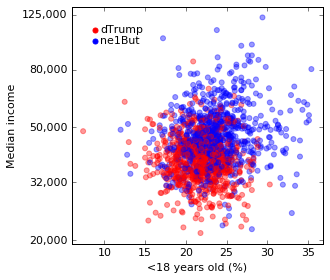

In [26]:
pylab.rcParams['figure.figsize']=(4.5,4.25)

fig = plt.figure()
ax = fig.add_subplot(111) 
lmi_axis(ax,[20000,32000,50000,80000,125000])
xyscatter(ax,u18,lmi,"<18 years old (%)","Median income",col,col,25,.4)
dtlegend(ax,u18,lmi,['r','r','b','b'],25)

* Okay, back to the data
  * remember, we're trying to predict if a county will go Donald based on characteristics of it's Age and Income 
  
* The data is not (linearly) separable
* We therefore (seem to) have to use the soft margin support vector classifier for this data
* This requires a choice for $C$ 
* Remember, $C$ controls the tradeoff of the margin size $\frac{1}{||\textbf{w}||}$ and the cumulative violations of the margin $\sum_{n=1}^N\epsilon_n$ in 

$$\underset{\textbf{w},\textbf{$\epsilon$}}{\text{min}}\ \frac{\textbf{w}'\textbf{w}}{2} + C\sum_{n=1}^N\epsilon_n$$

* Large $C$ heavily penalizes margin violations (smaller margins, fewer support vectors) 
* Small $C$ tolerates more violation (wider margins, more support vectors) 

* **We will choose $C$ by cross-validation**

In [29]:
from sklearn import cross_validation

k_folds = cross_validation.KFold(len(lmi),n_folds=10)

s,mn,mx,svs,marg=([],[],[],[],[])
cs=[c for c in range(-5,4)]
for c in cs:
   SVM=SVC(C=10**c,kernel='linear')
   tmp=cross_validation.cross_val_score(SVM,list(zip(scale(u18),scale(lmi))),dtw,cv=k_folds)
   s+=[np.mean(tmp)]
   mn+=[np.max(tmp)]
   mx+=[np.min(tmp)]
   fit=SVM.fit(list(zip(scale(u18),scale(lmi))),dtw)
   svs+=[len(fit.support_vectors_)]
   marg+=[1/np.sqrt(np.sum(fit.coef_*fit.coef_))]

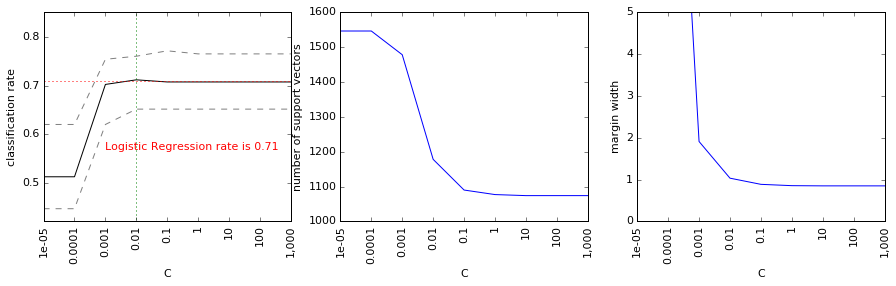

In [47]:
def scaledaxis(ax,a,b):    
  ax.tick_params(axis='y',colors='gray')
  ax.tick_params(axis='x',colors='gray')
  ax.xaxis.tick_bottom()
  ax2 = ax.twinx().twiny()
  ax2.scatter(a,b,color="w",alpha=0,s=0,edgecolor='w')
  ax2.yaxis.tick_right()
  ax2.xaxis.tick_top()
  return ax2

def plotErSvMa(fig, comp):
  ax = fig.add_subplot(131) 
  plt.plot(cs,s,color='k')
  plt.plot(cs,mx,linestyle='--',color='gray')
  plt.plot(cs,mn,linestyle='--',color='gray')
  plt.ylabel("classification rate")
  plt.xlabel("C")
  plt.ylim([min(mn[1:])-np.ptp(s[1:]),max(mx[1:])+np.ptp(s[1:])])    
  m=cs[(np.array(s).argmax(axis=0))]
  plt.plot([m,m],[0,1],color="g",linestyle=":")
  plt.xticks(cs,["{:,}".format(10**v) for v in cs],rotation='vertical')
  plt.plot([min(cs),max(cs)],2*[comp],color='r',linestyle=":")
  ax.annotate('Logistic Regression rate is '+str(round(comp,2)),xy=(-3,comp*.8),color='r')

  ax = fig.add_subplot(132)    
  plt.plot(cs,svs,color='b')
  plt.xticks(cs,["{:,}".format(10**v) for v in cs],rotation='vertical')
  plt.xlabel("C")
  plt.ylabel("number of support vectors")

  ax = fig.add_subplot(133)    
  plt.plot(cs,marg,color='b')
  plt.xticks(cs,["{:,}".format(10**v) for v in cs],rotation='vertical')
  plt.xlabel("C")
  plt.ylabel("margin width")
  plt.ylim([0,5])

pylab.rcParams['figure.figsize']=(13,3.75)
fig = plt.figure()
plt.gcf().subplots_adjust(left=.0015)
lr=LogisticRegression(C=100000000)
lrs=cross_validation.cross_val_score(lr,list(zip(u18,lmi)),dtw,cv=k_folds)
plotErSvMa(fig,np.mean(lrs))

#### *K-folds cross-validation* 
* Partitions the data into K folds
* Scores the prediction of each of the K folds based on the fit of the other K-1 folds.
* This gives K "out of sample" estimates of prediction accuracy, i.e., model estimation variance (overfitting)

#### *K-folds parameter tuning* 
* Comparing K-folds prediction accuracy at different levels of $C$ can be used to select a $C$ 
* We choose $C$ with strongest "out of sample" prediction accuracy (and least amount of observed overfitting)
* It is still optimized with respect to the data at hand...


* ***Smaller $C$ means (a) increased margins, thus (b) more support vectors, thus (c) more regularization***
* ***Larger $C$ means (a) decreased margins, thus (b) fewer support vectors, thus (c) less regularization***

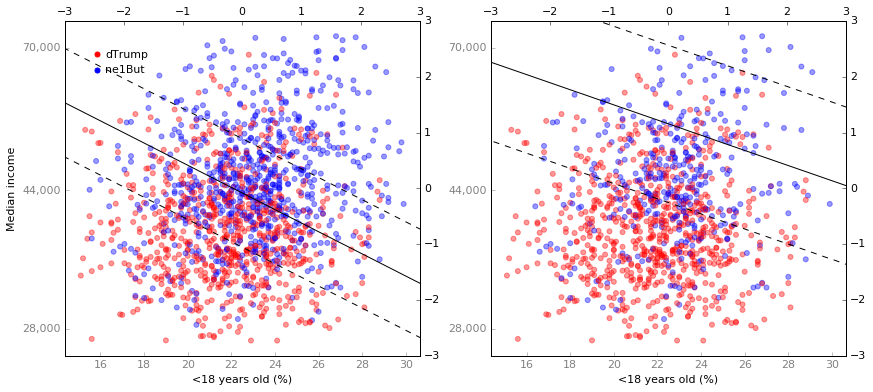

In [56]:
pylab.rcParams['figure.figsize']=(14,6)
fig = plt.figure()

ax = fig.add_subplot(121)  

kp=[all(i) for i in zip(15<u18,u18<30,10.2<lmi,lmi<11.2)]
colr=[c for c,k in zip(col,kp) if k]
xyscatter(ax,u18[kp],lmi[kp],"<18 years old (%)","Median income",colr,colr,25,.4)
lmi_axis(ax,[28000,44000,70000])
dtlegend(ax,u18[kp],lmi[kp],['r','r','b','b'],25)

scaledaxis(ax,[c for c,k in zip(scale(u18),kp) if k],[c for c,k in zip(scale(lmi),kp) if k])
plt.xlim([-3,3])
plt.ylim([-3,3])

SVM=SVC(C=.5,kernel='linear')
fit=SVM.fit(list(zip(scale(u18),scale(lmi))),dtw)
svm_score(ax,scale(u18),scale(lmi),250,fit)

ax = fig.add_subplot(122)  

sbst=[True if i<1000 or o==1 else False for i,o in zip(u18.index,dtw)]
kp=[all(i) for i in zip(15<u18,u18<30,10.2<lmi,lmi<11.2,sbst)]
colr=[c for c,k in zip(col,kp) if k]
xyscatter(ax,u18[kp],lmi[kp],"<18 years old (%)","",colr,colr,25,.4)
lmi_axis(ax,[28000,44000,70000])
scaledaxis(ax,[c for c,k in zip(scale(u18),kp) if k],[c for c,k in zip(scale(lmi),kp) if k])
plt.xlim([-3,3])
plt.ylim([-3,3])
fit=SVM.fit(list(zip(scale(u18[kp]),scale(lmi[kp]))),dtw[kp])
svm_score(ax,scale(u18),scale(lmi),500,fit)

* Here is the SVC fit on the full data set
  * blue points on the bottom and red points on the top are support vectors
  * all points in the  margin are support vector
  * we acheived an in sample classification rate of 71% -- same as logistic regression
* If the number of data points in each class is different the SVC will prefer the larger class 
  * (since it is trying to make fewer mistakes overall)
  * the data can be weighted to balance the penalties between class and hence "normalize" class size 

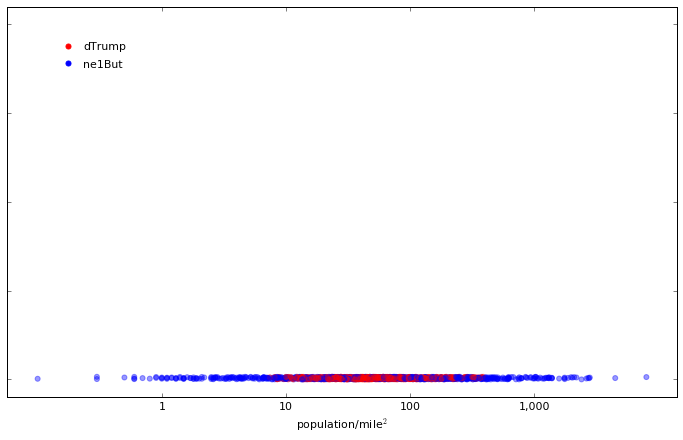

In [59]:
pylab.rcParams['figure.figsize']=(12,7)
ppm2 = np.log(rp['ppm2'])
blnk = list(-.08+np.random.uniform(0,.01,len(ppm2)))+[1.25]
dtw = rp['DT']
col = ['b' if i == 0 else 'r' for i in dtw]

def ppm2_axis(ax,val):
  plt.xticks(np.log(val),["{:,}".format(v) for v in val])

fig, ax = plt.subplots()  
xyscatter(ax,list(ppm2)+[0],blnk,r"population/mile$^2$","",list(col)+['w'],list(col)+['w'],25,.4)
dtlegend(ax,ppm2,blnk,['r','r','b','b'],25)
ppm2_axis(ax,[1,10,100,1000])
oblvn=plt.yticks(np.linspace(min(blnk),max(blnk),5),[""]*5)

* Okay, let's look at some new data
* This is just a one dimensional plot in $\mathbb{R}^1$ (even though it looks like $\mathbb{R}^2$)
* We see that "average" population density counties favor Trump while "unusual" counties favor his opponents

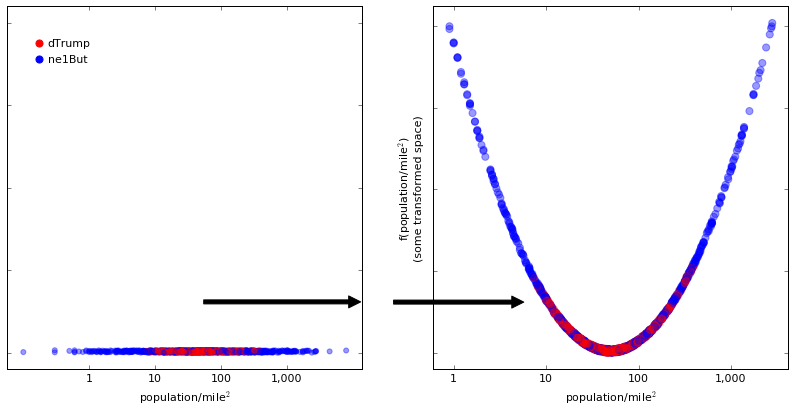

In [65]:
pylab.rcParams['figure.figsize']=(14,6.5)

fig = plt.figure()

ax = fig.add_subplot(121)  
xyscatter(ax,list(ppm2)+[0],blnk,r"population/mile$^2$","",list(col)+['w'],list(col)+['w'],25,.4)
dtlegend(ax,ppm2,blnk,['r','r','b','b'],50)
ppm2_axis(ax,[1,10,100,1000])
plt.yticks(np.linspace(min(blnk),max(blnk),5),[""]*5)
ax.annotate('',xy=(9.5,.125),xytext=(4,.125),arrowprops=dict(facecolor='k',shrink=.001))

ax = fig.add_subplot(122)  
col=np.array(col)
fx=scale(ppm2)**2
xyscatter(ax,ppm2[fx<9],fx[fx<9]+np.random.uniform(0,.1,sum(fx<9)),r"population/mile$^2$",
          "f(population/mile$^2$)\n(some transformed space)",col[fx<9],col[fx<9],50,.4)
ppm2_axis(ax,[1,10,100,1000])
plt.yticks(np.linspace(min(fx[fx<9]),max(fx[fx<9]),5),[""]*5)
oblvn=ax.annotate('',xy=(1.75,1.35),xytext=(-1.5,1.35),arrowprops=dict(facecolor='k',shrink=.001))

* So here's a super idea: let's convert (transform) the predictor into a new space were we can find a linear relationship


* What we're doing is embedding the original axis as a subspace in a new space -- here a "U" in a bivariate space


* But notice it's really still the same space, just bent/stretched/twisted into a new shape where linear machinary works

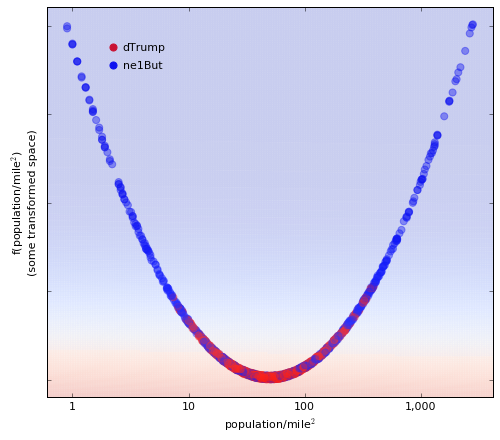

In [67]:
pylab.rcParams['figure.figsize']=(8,7)

fig, ax = plt.subplots()
xyscatter(ax,ppm2[fx<9],fx[fx<9]+np.random.uniform(0,.1,sum(fx<9)),r"population/mile$^2$",
          "f(population/mile$^2$)\n(some transformed space)",col[fx<9],col[fx<9],50,.4)
dtlegend(ax,ppm2[fx<9]+.5,fx[fx<9],['r','r','b','b'],50)
ppm2_axis(ax,[1,10,100,1000])
plt.yticks(np.linspace(min(fx[fx<9]),max(fx[fx<9]),5),[""]*5)

(x1,x2,p,px) = probsurface(ppm2[fx<9],fx[fx<9],dtw[fx<9],200)
plt.tricontourf(x1,x2,p,150,antialiased=True,cmap=plt.cm.coolwarm,alpha=.25)
pcol=np.array(['b']*len(p))
pcol[p>.5]='r'
oblvn=ax.scatter(x1,x2,alpha=.025,c=pcol,marker='.',linewidth=0)

* Now we can see that we have a linear gradient (in the "y" direction) 


* Logistic regression can now easily leverage the predictive power of this "linear" effect


* So it was a question of projecting the population density variable into a space where it's information was accessible

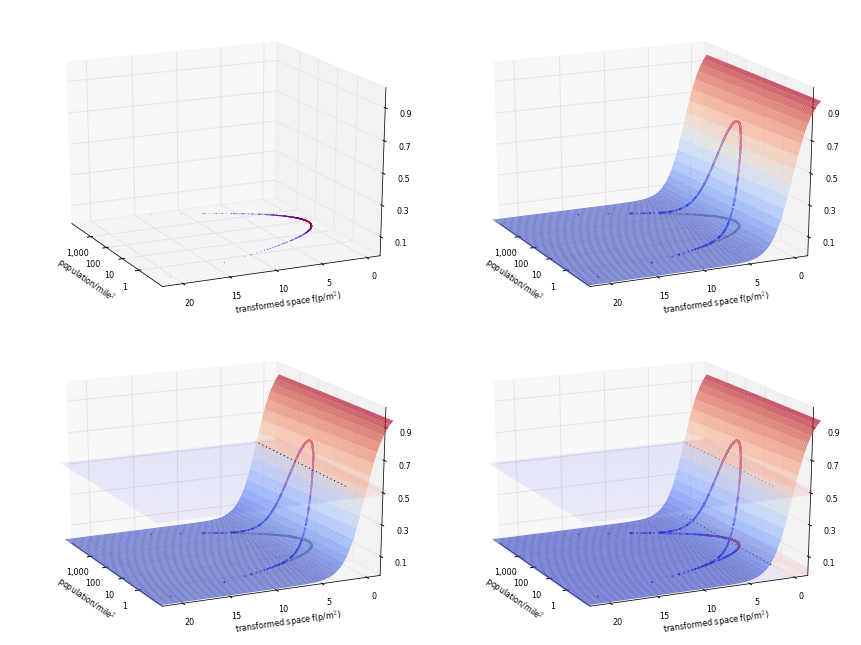

In [68]:
warnings.filterwarnings("ignore")
rcParams.update({'figure.autolayout': True})

pylab.rcParams['figure.figsize']=(12,9)

xyzsurface(ppm2,fx,dtw,col,"population/mile$^2$",
          "transformed space f(p/m$^2$)","",75,ppm2_axis,[1,10,100,1000],155,.035)

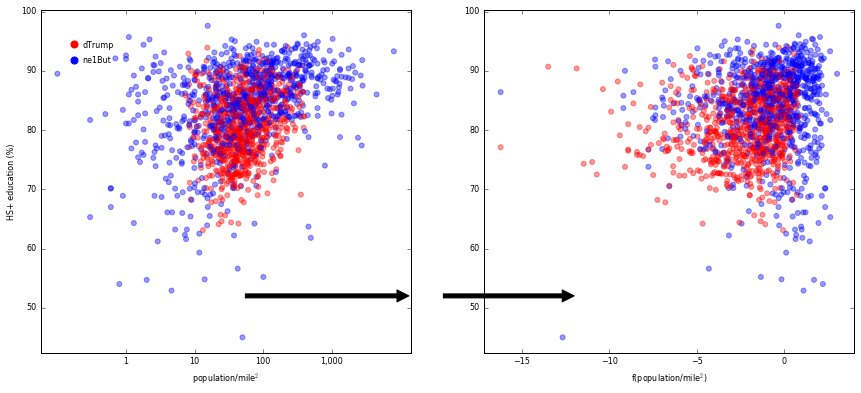

In [83]:
pylab.rcParams['figure.figsize']=(12,5.5)

withhs=rp['withhs']

fig = plt.figure()
ax = fig.add_subplot(121)  

xyscatter(ax,ppm2,withhs,"population/mile$^2$","HS+ education (%)",col,col,25,.4)
dtlegend(ax,ppm2,withhs,['r','r','b','b'],50)
ppm2_axis(ax,[1,10,100,1000])
ax.annotate('',xy=(9.5,52),xytext=(4,52),arrowprops=dict(facecolor='k',shrink=.001))

ax2 = fig.add_subplot(122)  

xyscatter(ax2,np.log(scale(ppm2)**2),withhs,
          "f(population/mile$^2$)","$\ $\n$\ $\n$\ $\n$\ $",col,col,25,.4)
oblvn=ax2.annotate('',xy=(-12,52),xytext=(-19.5,52),arrowprops=dict(facecolor='k',shrink=.001))


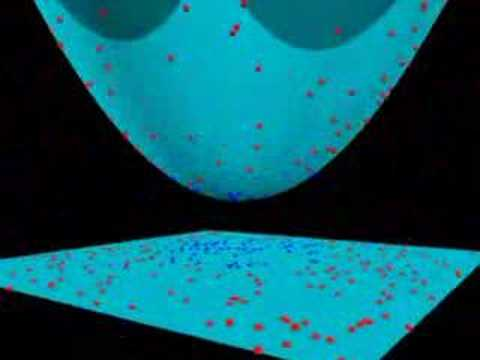

In [35]:
from IPython.display import YouTubeVideo
YouTubeVideo("3liCbRZPrZA")

* $\text{What we have done is transform}$ $$\textbf{$x$}=(x_1,x_2) 
\rightarrow \textbf{$z$}=\left(f(x_1),g(x_2)\right)$$
* $\text{Or previously}$ $$\textbf{$x$}=(x_1,x_2) 
\rightarrow \textbf{$z$}=\left(f(x_1),x_2\right) \quad \text{ and } \quad \textbf{$x$}=(x_1) \rightarrow \textbf{$z$}=\left(x_1,f(x_1)\right)$$
<br>
* $\text{Indeed, for an arbitrary transform $\ f: \mathbb{R}^P \mapsto \mathbb{R}^Q\ $}$
we can map 
$$\textbf{$x$} \in \mathbb{R}^P \rightarrow \textbf{$z$} \in \mathbb{R}^Q$$

<table align="center">
<tr>
<td><img src="stuffs/kernel1.png" width="500px" align="center"></td> 
</tr>
</table>

* $\text{Regardless of if we use $\textbf{x}$ or $\textbf{z}$, the support vector classifier is estimated same way, namely}$
$$
\begin{array}{rcl}
\textbf{1}'\textbf{$\lambda$} - \frac{1}{2}\textbf{$\lambda$}'\textbf{Q}\textbf{$\lambda$}, 
\quad Q_{mn} &=&y_m\textbf{x}_m'\textbf{x}_ny_n, \ \textit{or} \\
\textbf{1}'\textbf{$\lambda$} - \frac{1}{2}\textbf{$\lambda$}'\textbf{Q}\textbf{$\lambda$}, 
\quad Q_{mn} &=&y_m\textbf{z}_m'\textbf{z}_ny_n \quad\quad \textit{with }
\end{array} 
\left[
\begin{array}{c}\textbf{$-I$}\\-\textbf{$y$}\\\textbf{$y$}\\\textbf{$I$}\end{array}
\right]\textbf{$\lambda$} \leq 
\left[
\begin{array}{c}\textbf{$0$}\\0\\0\\\textbf{$C$}\end{array}
\right]
$$

* $\text{Notice that this only depends on the inner product $\textbf{x}_1'\textbf{x}_2$ or $\textbf{z}_1'\textbf{z}_2$}$


* $\text{Now suppose I could produce a function $K$ of just $\textbf{x}_1,\textbf{x}_2$
that was equal to the inner product $\textbf{z}_1'\textbf{z}_2$}$ 

$$\textbf{z}_1'\textbf{z}_2=f(\textbf{x}_1)'f(\textbf{x}_2) = K(\textbf{x}_1,\textbf{x}_2)$$


* $\text{for some map }$ $f:\ \textbf{x} \in \mathbb{R}^P \mapsto \textbf{z} \in \mathbb{R}^Q$


* $\text{Such a function is called a } \textit{kernel}$


* $\text{Kernels allows us to compute } \textit{inner products} \text{ in $f(\textbf{x})$ space without actually having to visiting the space}$


* $\text{This is called the } \textit{"kernel trick"}$ 

* $\textit{Are kernels even real??}  \text{ (Yes, here are a couple examples)}$ 

$$
\begin{array}{rl}
f(x)&=&(x_1,x_1^2)\\ &&\\
f(x_1)'f(x_2)&=&x_1x_2+x_1^2x_2^2\\
&=&K(x_1,x_2)\\&&\\&&\\&&\\&&\\&&
\end{array}
\quad\quad
\begin{array}{rl}
f(x_1)'f(x_2)&=& \exp\left(-\left|x_1-x_2\right|^2\right) \\
&=& \exp\left(-x_1^2+2x_1x_2-x_2^2\right) \\
&=& \exp\left(-x_1^2\right)\exp\left(-x_2^2\right)\exp\left(2x_1x_2\right) \\
&=& e^{-x_1^2}e^{-x_2^2} \sum_{k=0}^{\infty} \frac{(2x_1x_2)^k}{k!}\\
&=&
e^{-x_1^2}
\left[\begin{array}{cccc}
\sqrt{\frac{2^0}{0!}}x_1^0, & \sqrt{\frac{2^1}{1!}}x_1^1, & \cdots &
\end{array}
\right]
e^{-x_2^2}
\left[\begin{array}{c}
\sqrt{\frac{2^0}{0!}}x_2^0\\ \sqrt{\frac{2^1}{1!}}x_2^1\\ \vdots\\
\end{array}
\right]
\end{array}
$$





* $\text{Polynomial Kernel } \left(1 + x_1\cdot x_2\right)^d$

<table align="center">
<tr>
<td><img src="stuffs/kernel5.png" width="200px" align="center"><br><br><br></td> 
<td><img src="stuffs/kernel2.png" width="550px" align="center"></td> 
</tr>
</table>


* $\text{Radial Basis Function (rbf) } \exp\left(-\gamma\left|\left|x_1-x_2\right|\right|^2\right)$

<table align="center">
<tr>
<td></td><td></td><td></td><td><img src="stuffs/kernel5.png" width="145px" align="center"></td> 
<td><img src="stuffs/kernel3.png" width="300px" align="center"></td> 
<td><img src="stuffs/kernel4.png" width="350px" align="center"></td> 
</table>





<table align="center">
<tr><td><img src="stuffs/rbfex.png" width="1000px" align="center"></td></tr>
</table>




<table align="center">
<tr>
<td><img src="stuffs/kernel6.png" width="400px" align="center"><br><br></td> 
<td><img src="stuffs/kernel7.png" width="350px" align="center"></td> 
</tr>
</table>




In [84]:
k_folds = cross_validation.KFold(len(ppm2),n_folds=10)

s,mn,mx,svs,marg=([],[],[],[],[])
cs=[c for c in range(-5,4)]
for c in cs:
   SVM=SVC(C=10**c,kernel='rbf')
   tmp=cross_validation.cross_val_score(SVM,list(zip(scale(ppm2),scale(withhs))),dtw,cv=k_folds)
   s+=[np.mean(tmp)]
   mn+=[np.max(tmp)]
   mx+=[np.min(tmp)]
   fit=SVM.fit(list(zip(scale(ppm2),scale(withhs))),dtw)
   svs+=[len(fit.support_vectors_)]
   marg+=[0]    

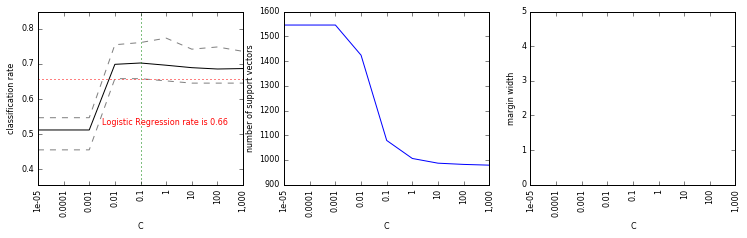

In [770]:
rcParams.update({'figure.autolayout': False})
warnings.resetwarnings()

pylab.rcParams['figure.figsize']=(12.5,3.1)
fig = plt.figure()
lrs=cross_validation.cross_val_score(lr,list(zip(np.log(scale(ppm2)**2),withhs)),dtw,cv=k_folds)
plotErSvMa(fig,np.mean(lrs))

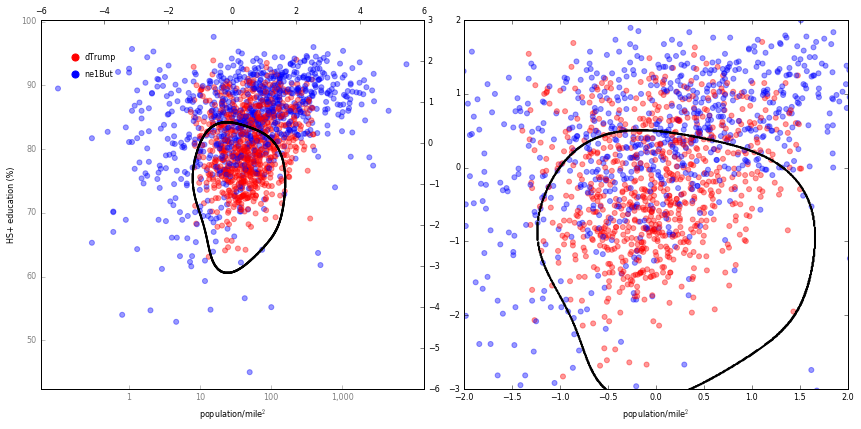

In [86]:
pylab.rcParams['figure.figsize']=(12,6)
fig = plt.figure()
ax = fig.add_subplot(121)  

xyscatter(ax,ppm2,withhs,"population/mile$^2$","HS+ education (%)",col,col,25,.4)
dtlegend(ax,ppm2,withhs,['r','r','b','b'],50)
ppm2_axis(ax,[1,10,100,1000])

ax=scaledaxis(ax,scale(ppm2),scale(withhs))

SVM=SVC(C=2.5,kernel='rbf')
fit=SVM.fit(list(zip(scale(ppm2),scale(withhs))),dtw)
svm_score2(ax,scale(ppm2),scale(withhs),0,'k',600,fit)
#svm_score2(ax,scale(ppm2),scale(withhs),1,'g',300,fit)
#svm_score2(ax,scale(ppm2),scale(withhs),-1,'y',300,fit)

ax = fig.add_subplot(122)  
xyscatter(ax,scale(ppm2),scale(withhs),
          "population/mile$^2$","",col,col,25,.4)
svm_score2(ax,scale(ppm2),scale(withhs),0,'k',600,fit)

plt.xlim([-2,2])
oblvn=plt.ylim([-3,2])

* We specified the *"radial basis function"* kernel (the second example kernel from above)
* This projects our data into a space with an infinite number of dimensions (!?!?)
  * (This new space is big! And a highly non-linear transformation of the original space)
  * (remember our "U"-bending transformation?)


* Because this space is so large we actually probably **could** find a hyperplane that linearly separates the data!!
  * so all the "soft margin" stuff *(Where is it, anyway?)* -- saying "oh, data isn't linearly separable" -- was moot!  
  * ...except of course it does provide regularization... so there's that...


* When we project into this new space we beat the logistic regression
  * (and all our hard work to transform the variables to allow us to exploit linear relationships) 
  * And we didn't even have to think about the transformation that was happening!!


* We seemingly confronted the "curse of dimensionality" head on, <b>and won</b> -- inducing no overfitting!

# Neat things we covered
* **SVCs** provide a "best" separating hyperplane that maximizes the "margin" between classes
  * they are an elegant solution to the classification problem


* **Soft Margin SVCs** use a penalty $C$ to control the amount of violation of the margin 
  * Increasing the margin regularizes estimation via the separating planes reliance on blunt data characteristics 


* **Cross-Validation** can be used to tune $C$ and assess model estimate variation
  * This allows us to assess overfitting 


* **the *"Kernel Trick"*** projects our prediction space into another space where we can calculate the inner product *using only the variables of the original space*  
  * this allows us to readily leverage non-linearly transformed variable spaces 
  * and makes SVMs powerful and flexible class of "out of the box" solutions 


# Neat things we didn't cover
* **loss functions and SGD** 
  * SVRs, etc.


* **Multiclass Classifiers** 
  * one-versus-many and one-versus-one



* **Kernels**
  * you know you wanna...
  

In [775]:
from sklearn.linear_model import SGDClassifier

<table align="left">
<tr><td>
<img src="stuffs/loss.gif" width="500px" align="left">
</tr></td>
</table>

In [60]:
from sklearn.neighbors import KernelDensity
def getkde(x,grid):
  kde=KernelDensity(bandwidth=.2)
  kde.fit(x[:,np.newaxis])
  return kde.score_samples(grid[:,np.newaxis])

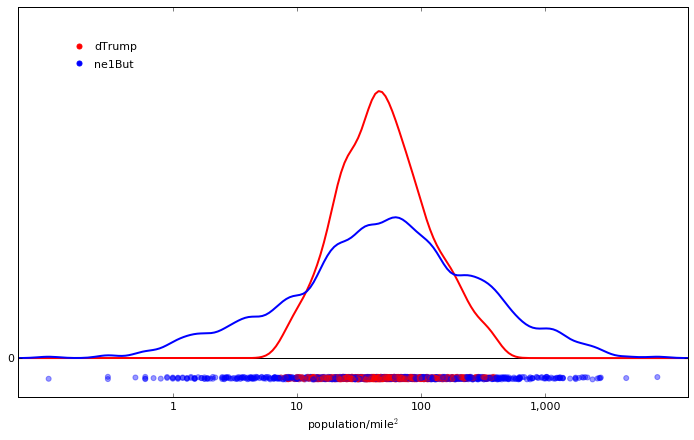

In [61]:
fig, ax = plt.subplots()  

xyscatter(ax,list(ppm2)+[0],blnk,r"population/mile$^2$","",list(col)+['w'],list(col)+['w'],25,.4)
dtlegend(ax,ppm2,blnk,['r','r','b','b'],25)
ppm2_axis(ax,[1,10,100,1000])
plt.yticks([0],["0"])

grid=np.linspace(min(ppm2)-.2*np.ptp(ppm2),max(ppm2)+.2*np.ptp(ppm2),250)
plt.plot(grid,[0]*len(grid),color="black")

d1=np.exp(getkde(ppm2[dtw==1],grid))
m=max(d1)
d1=d1/m
d0=np.exp(getkde(ppm2[dtw==0],grid))/m
plt.plot(grid,d1,color='r',linewidth=2)
oblvn=plt.plot(grid,d0,color='b',linewidth=2)

* Here are the relative "densities" of Trump and non-Trump counties
* It is as expected: "average" population density counties favor Trump while more extreme counties favor his opponents
* We should be able to leverage this information!

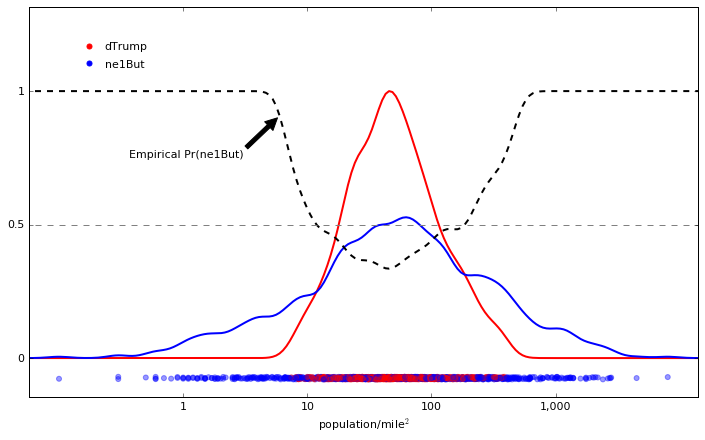

In [62]:
fig, ax = plt.subplots()  

xyscatter(ax,list(ppm2)+[0],blnk,r"population/mile$^2$","",list(col)+['w'],list(col)+['w'],25,.4)
dtlegend(ax,ppm2,blnk,['r','r','b','b'],25)
ppm2_axis(ax,[1,10,100,1000])
tmp=plt.yticks([0,.5,1],["0","0.5","1"])

plt.plot(grid,d1,color='r',linewidth=2)
plt.plot(grid,d0,color='b',linewidth=2)
plt.plot(grid,d0/(d1+d0),color='k',linewidth=2,linestyle='--')
plt.plot(grid,[.5]*len(grid),color="grey",linestyle="--")
oblvn=ax.annotate('Empirical Pr(ne1But)',xy=(1.75,.9),xytext=(-1,.75),
            arrowprops=dict(facecolor='k',shrink=.001))

* Here we show the relative proportion non Trump counties to Trump counties across population density
* The 50/50 line is crossed when the relative propotion of Trump to non-Trump counties are equal
* Clearly there is predictive power in the population density variable

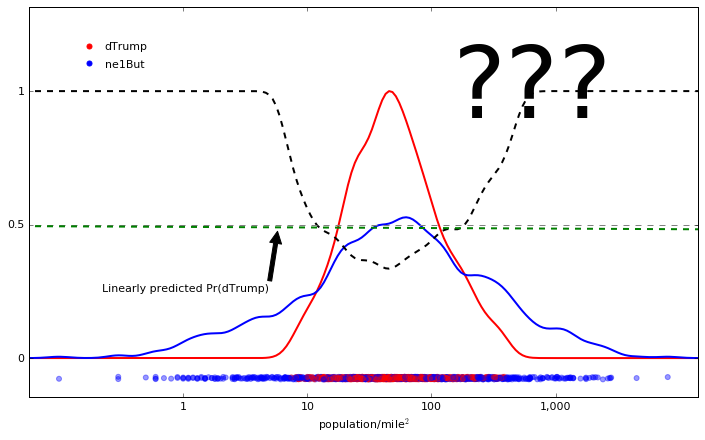

In [63]:
fig, ax = plt.subplots()  

xyscatter(ax,list(ppm2)+[0],blnk,r"population/mile$^2$","",list(col)+['w'],list(col)+['w'],25,.4)
dtlegend(ax,ppm2,blnk,['r','r','b','b'],25)
ppm2_axis(ax,[1,10,100,1000])
tmp=plt.yticks([0,.5,1],["0","0.5","1"])

plt.plot(grid,d1,color='r',linewidth=2)
plt.plot(grid,d0,color='b',linewidth=2)
plt.plot(grid,d0/(d1+d0),color='k',linewidth=2,linestyle='--')
plt.plot(grid,[.5]*len(grid),color="grey",linestyle="--")

lr=LogisticRegression(C=10000000)
fit=lr.fit(ppm2.reshape(-1,1),np.ravel(dtw))
p=fit.predict_proba(grid.reshape(-1,1))
plt.plot(grid,p[:,1],color='green',linewidth=2,linestyle='--')

ax.annotate('???',xy=(5,.9),fontsize=100)
oblvn=ax.annotate('Linearly predicted Pr(dTrump)',xy=(1.75,.475),xytext=(-1.5,.25),
            arrowprops=dict(facecolor='k',shrink=.001))

* However, when we fit our trusty old logistic regression on the population density variable, we find no predictive power
* This is becaues the relationship is not linear -- preference doesn't constantly [in/de]crease with population density
* The relationship is said to be *"non-linear"* in the original predictor space